## Sentiment Classification of Top 10 Businesses in the Yelp Dataset

***
### 1. Data

- Import Data
- Data Exploratory
- Analysis of a single business

***
### 2. Data Cleaning

- Top 10 business
- Create Word Cloud
- Preprocess the text

***
### 3. Data Transformation

- Split the data into training and test sets
- Feature Extraction - Text to Vector
1. CountVectorizer
2. N-grams
3. TF-IDF
4. TF-IDF + N-gram


### 4. Model Design
- Logistic regression model

- Train Multiple Models Together
1. KNeighbors Classifier
2. Decision Tree Classifier
3. Random Forest Classifier
4. AdaBoost Classifier
5. Gradient Boosting Classifier



### 5. Analytical Analysis of Models

#### Result
1. Result on Count Vectorizer Data
2. Result on N-grams Data
3. Result on TF-IDF Data
4. Result on TF-IDF & N-grams Data

#### Analysis
1. Comparison of the models Accuracy
2. Comparison of the models Precision
3. Comparison of the models Recall
4. Comparison of the models F1Score
5. Overall Comparison with all metrics


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Data

In [2]:
# import Data
review = pd.read_json("yelp_academic_dataset_review.json", lines=True)

review.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


In [3]:
col = review.columns

col

Index(['votes', 'user_id', 'review_id', 'stars', 'date', 'text', 'type',
       'business_id'],
      dtype='object')

In [4]:
len(review)

229907

#### Data Exploratory

In [5]:
status_vals = review.business_id.value_counts()

status_vals.head()

hW0Ne_HTHEAgGF1rAdmR-g    844
VVeogjZya58oiTxK7qUjAQ    794
JokKtdXU7zXHcr20Lrk29A    731
ntN85eu27C04nwyPa8IHtw    679
EWMwV5V9BxNs_U6nNVMeqw    645
Name: business_id, dtype: int64

In [6]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [7]:
review_sub_stars = count_values_in_column(review, "business_id")

review_sub_stars.head()

,Total,Percentage
hW0Ne_HTHEAgGF1rAdmR-g,844,0.37
VVeogjZya58oiTxK7qUjAQ,794,0.35
JokKtdXU7zXHcr20Lrk29A,731,0.32
ntN85eu27C04nwyPa8IHtw,679,0.30
EWMwV5V9BxNs_U6nNVMeqw,645,0.28


#### Analysis of a single business

In [8]:
review_sub = review.loc[(review['business_id'] == 'hW0Ne_HTHEAgGF1rAdmR-g')]

review_sub.head()

,votes,user_id,review_id,stars,date,text,type,business_id
7,"{'funny': 0, 'useful': 1, 'cool': 0}",1ieuYcKS7zeAv_U15AB13A,JL7GXJ9u4YMx7Rzs05NfiQ,4,2012-07-12,"Luckily, I didn't have to travel far to make m...",review,hW0Ne_HTHEAgGF1rAdmR-g
90,"{'funny': 9, 'useful': 7, 'cool': 7}",8tbXmjYGsYFZXk6ppuwRWQ,6iEP6dvHIefVMMnjeDRNcQ,1,2010-07-06,The beach paradise of Ixtapa-Zihuatenejo await...,review,hW0Ne_HTHEAgGF1rAdmR-g
146,"{'funny': 3, 'useful': 2, 'cool': 2}",gYIHSsoa260H544x9guLOg,t5Hxl0agkS7p3vDnbl3Yyg,3,2010-09-09,I have been through plenty of airports around ...,review,hW0Ne_HTHEAgGF1rAdmR-g
540,"{'funny': 2, 'useful': 2, 'cool': 2}",2FiNCj5rM3nF0qgaWf86Gg,ZSuen309_TLXd9UKZ3ISEw,2,2009-07-04,A pain to get in and out of. I dread each trip...,review,hW0Ne_HTHEAgGF1rAdmR-g
1125,"{'funny': 0, 'useful': 3, 'cool': 1}",A99dyhEqcd_yXKPfBWeZHA,hUIEsrEvC5L-0B45_8bMtQ,4,2012-05-30,"My home airport, so with work travel, I'm pass...",review,hW0Ne_HTHEAgGF1rAdmR-g


In [9]:
# Analysis of ratings 1- 5

review_sub_stars = count_values_in_column(review_sub, "stars")

review_sub_stars

,Total,Percentage
4,292,34.60
3,280,33.18
2,140,16.59
5,78,9.24
1,54,6.40


In [10]:
review_sub.mean()


stars    3.236967
dtype: float64

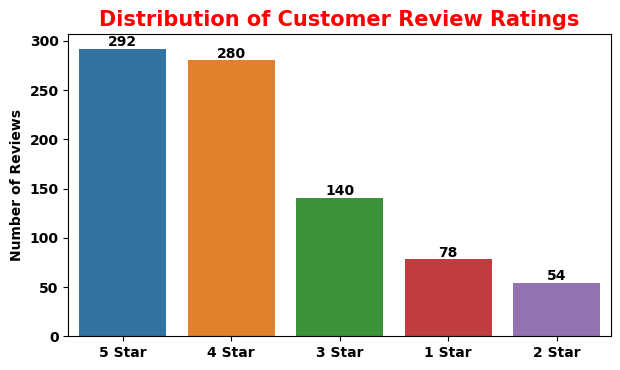

In [11]:
review_sub_stars = count_values_in_column(review_sub,"stars")


plt.figure(figsize=(7,4),dpi=100),
plt.style.use('default')
stars=["5 Star","4 Star","3 Star","1 Star","2 Star"]
ax = sns.barplot(x= stars, y= "Total", data= review_sub_stars)
plt.title("Distribution of Customer Review Ratings", weight= "bold", c= "red", fontsize=15)
plt.xlabel("", weight="bold", c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Number of Reviews", weight= "bold", c="k")
plt.yticks(weight="bold")


for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold", color= 'black')

        
plt.show()

In [12]:
review_sub["year"] = pd.DatetimeIndex(review_sub["date"]).year

In [13]:
review_sub["month"] = pd.DatetimeIndex(review_sub["date"]).month

In [14]:
review_sub.head()

,votes,user_id,review_id,stars,date,text,type,business_id,year,month
7,"{'funny': 0, 'useful': 1, 'cool': 0}",1ieuYcKS7zeAv_U15AB13A,JL7GXJ9u4YMx7Rzs05NfiQ,4,2012-07-12,"Luckily, I didn't have to travel far to make m...",review,hW0Ne_HTHEAgGF1rAdmR-g,2012,7
90,"{'funny': 9, 'useful': 7, 'cool': 7}",8tbXmjYGsYFZXk6ppuwRWQ,6iEP6dvHIefVMMnjeDRNcQ,1,2010-07-06,The beach paradise of Ixtapa-Zihuatenejo await...,review,hW0Ne_HTHEAgGF1rAdmR-g,2010,7
146,"{'funny': 3, 'useful': 2, 'cool': 2}",gYIHSsoa260H544x9guLOg,t5Hxl0agkS7p3vDnbl3Yyg,3,2010-09-09,I have been through plenty of airports around ...,review,hW0Ne_HTHEAgGF1rAdmR-g,2010,9
540,"{'funny': 2, 'useful': 2, 'cool': 2}",2FiNCj5rM3nF0qgaWf86Gg,ZSuen309_TLXd9UKZ3ISEw,2,2009-07-04,A pain to get in and out of. I dread each trip...,review,hW0Ne_HTHEAgGF1rAdmR-g,2009,7
1125,"{'funny': 0, 'useful': 3, 'cool': 1}",A99dyhEqcd_yXKPfBWeZHA,hUIEsrEvC5L-0B45_8bMtQ,4,2012-05-30,"My home airport, so with work travel, I'm pass...",review,hW0Ne_HTHEAgGF1rAdmR-g,2012,5


In [15]:
# Analysis of ratings 1- 5 for each year

review_sub_year = count_values_in_column(review_sub,"year")
review_sub_year

,Total,Percentage
2012,287,34.00
2011,264,31.28
2010,130,15.40
2008,57,6.75
2009,55,6.52
2007,37,4.38
2006,8,0.95
2013,6,0.71


In [16]:
# Analysis of ratings 1- 5 for each month

review_sub_month = count_values_in_column(review_sub,"month")
review_sub_month

,Total,Percentage
12,85,10.07
3,80,9.48
1,79,9.36
8,74,8.77
9,72,8.53
5,72,8.53
6,70,8.29
4,70,8.29
11,65,7.70
7,64,7.58


In [17]:
mean_month =review_sub.groupby("month").stars.mean()
mean_month = pd.DataFrame(mean_month)
mean_month

,stars
month,
1,3.316456
2,2.920000
3,3.025000
4,3.300000
5,3.250000
6,3.314286
7,2.953125
8,3.135135
9,3.333333


In [18]:
mean_year =review_sub.groupby("year").stars.mean()
mean_year = pd.DataFrame(mean_year)
mean_year

,stars
year,
2006,3.500000
2007,3.594595
2008,3.298246
2009,3.054545
2010,3.223077
2011,3.155303
2012,3.285714
2013,3.333333


<AxesSubplot:xlabel='month', ylabel='stars'>

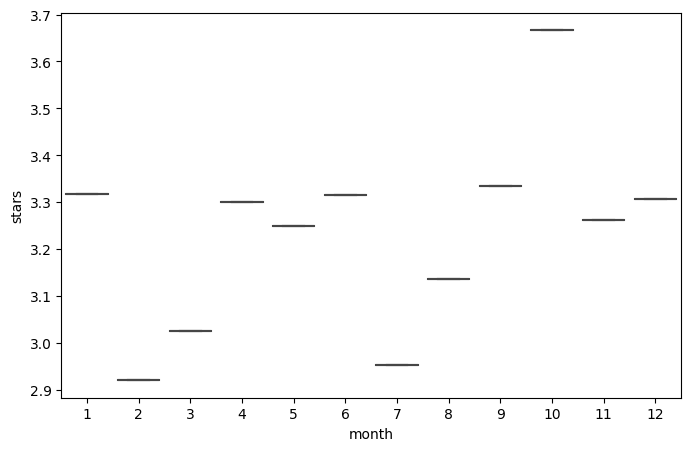

In [19]:
# Mean ratings for each month

plt.figure(figsize=(8,5),dpi=100),
plt.style.use('default')
sns.boxplot(data=mean_month, y="stars",x=mean_month.index)

<AxesSubplot:xlabel='year', ylabel='stars'>

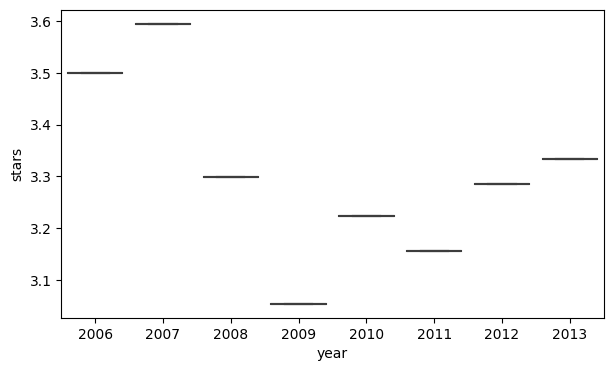

In [20]:
# Mean ratings for each year

plt.figure(figsize=(7,4),dpi=100),
plt.style.use('default')
sns.boxplot(data=mean_year, y="stars",x=mean_year.index)

### Data Cleaning


#### Top 10 business

In [21]:
review_sub_stars = count_values_in_column(review, "business_id")

review_sub_stars.head(10)

,Total,Percentage
hW0Ne_HTHEAgGF1rAdmR-g,844,0.37
VVeogjZya58oiTxK7qUjAQ,794,0.35
JokKtdXU7zXHcr20Lrk29A,731,0.32
ntN85eu27C04nwyPa8IHtw,679,0.30
EWMwV5V9BxNs_U6nNVMeqw,645,0.28
V1nEpIRmEa1768oj_tuxeQ,588,0.26
WNy1uzcmm_UHmTyR--o5IA,575,0.25
SDwYQ6eSu1htn8vHWv128g,568,0.25
-sC66z4SO3tR7nFCjfQwuQ,540,0.23
QnAzW6KMSciUcuJ20oI3Bw,519,0.23


In [22]:
review_sub = review.loc[(review['business_id'] == 'hW0Ne_HTHEAgGF1rAdmR-g') | \
                        (review['business_id'] == 'VVeogjZya58oiTxK7qUjAQ') | \
                        (review['business_id'] == 'JokKtdXU7zXHcr20Lrk29A') | \
                        (review['business_id'] == 'ntN85eu27C04nwyPa8IHtw') | \
                        (review['business_id'] == 'EWMwV5V9BxNs_U6nNVMeqw') | \
                        (review['business_id'] == 'V1nEpIRmEa1768oj_tuxeQ') | \
                        (review['business_id'] == 'WNy1uzcmm_UHmTyR--o5IA') | \
                        (review['business_id'] == 'SDwYQ6eSu1htn8vHWv128g') | \
                        (review['business_id'] == '-sC66z4SO3tR7nFCjfQwuQ') | \
                        (review['business_id'] == 'QnAzW6KMSciUcuJ20oI3Bw')
                       ]

review_sub.head()

,votes,user_id,review_id,stars,date,text,type,business_id
7,"{'funny': 0, 'useful': 1, 'cool': 0}",1ieuYcKS7zeAv_U15AB13A,JL7GXJ9u4YMx7Rzs05NfiQ,4,2012-07-12,"Luckily, I didn't have to travel far to make m...",review,hW0Ne_HTHEAgGF1rAdmR-g
30,"{'funny': 0, 'useful': 2, 'cool': 0}",bCKjygWJZOQHCOzootbvow,dtpJXC5p_sdWDLSobluJ3Q,5,2011-05-09,"Disclaimer: Like many of you, I am a sucker fo...",review,V1nEpIRmEa1768oj_tuxeQ
90,"{'funny': 9, 'useful': 7, 'cool': 7}",8tbXmjYGsYFZXk6ppuwRWQ,6iEP6dvHIefVMMnjeDRNcQ,1,2010-07-06,The beach paradise of Ixtapa-Zihuatenejo await...,review,hW0Ne_HTHEAgGF1rAdmR-g
108,"{'funny': 0, 'useful': 0, 'cool': 0}",a_V8LRfMxGvpGtTwR2olrg,39gCBTrQVeM4GVOt_wEoLg,5,2012-12-16,It's just like pizza bianco without the wait. ...,review,V1nEpIRmEa1768oj_tuxeQ
146,"{'funny': 3, 'useful': 2, 'cool': 2}",gYIHSsoa260H544x9guLOg,t5Hxl0agkS7p3vDnbl3Yyg,3,2010-09-09,I have been through plenty of airports around ...,review,hW0Ne_HTHEAgGF1rAdmR-g


In [23]:
len(review_sub)

6483

In [24]:
review_sub.user_id.nunique()


4860

In [25]:
# Select the texts and the ratings

review = review_sub[["stars","text"]]
review.head(10)

,stars,text
7,4,"Luckily, I didn't have to travel far to make m..."
30,5,"Disclaimer: Like many of you, I am a sucker fo..."
90,1,The beach paradise of Ixtapa-Zihuatenejo await...
108,5,It's just like pizza bianco without the wait. ...
146,3,I have been through plenty of airports around ...
187,4,I love the ambiance at Joe's Farm Grill. It's...
195,4,"Great place for lunch, transport yourself back..."
205,5,"On one of my many visits to see mi amore, he t..."
277,4,We are lucky enough to live basically right ac...
296,4,"I'm going to stop being such a taker, and giv..."


In [26]:
pd.DataFrame(round(review.stars.value_counts(ascending=False, normalize=True),2))

,stars
5,0.42
4,0.35
3,0.13
2,0.06
1,0.03


In [27]:
# Adding Sentiment Columns

review.loc[review['stars'] == 3, 'sentiment'] = 'neutral' 
review.loc[review['stars'] < 3, 'sentiment'] = 'negative' 
review.loc[review['stars'] > 3, 'sentiment'] = 'positive' 
review = review[["stars","sentiment","text"]]
review.head(5)

,stars,sentiment,text
7,4,positive,"Luckily, I didn't have to travel far to make m..."
30,5,positive,"Disclaimer: Like many of you, I am a sucker fo..."
90,1,negative,The beach paradise of Ixtapa-Zihuatenejo await...
108,5,positive,It's just like pizza bianco without the wait. ...
146,3,neutral,I have been through plenty of airports around ...


In [28]:
pd.DataFrame(round(review.sentiment.value_counts(ascending=False, normalize=True),6))

,sentiment
positive,0.774179
neutral,0.134197
negative,0.091624


In [29]:
positive = len(review[review["sentiment"]=="positive"])
negative = len(review[review["sentiment"]=="negative"])
neutral = len(review[review["sentiment"]=="neutral"])

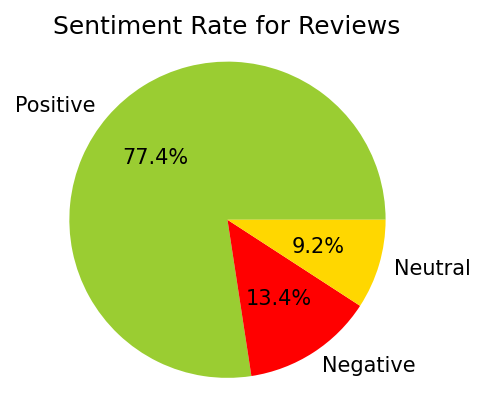

In [30]:
pie_sentiment = review.sentiment.value_counts(normalize=True)
plt.figure(figsize=(3,3),dpi=150),
labels = 'Positive','Negative',"Neutral"
colors = ['yellowgreen', 'red','gold']
plt.pie(pie_sentiment, colors=colors,labels=labels,autopct='%1.1f%%')
plt.style.use('default')
plt.title('Sentiment Rate for Reviews')
plt.axis('equal')
sizes = [positive, neutral, negative]
plt.show()

<AxesSubplot:ylabel='sentiment'>

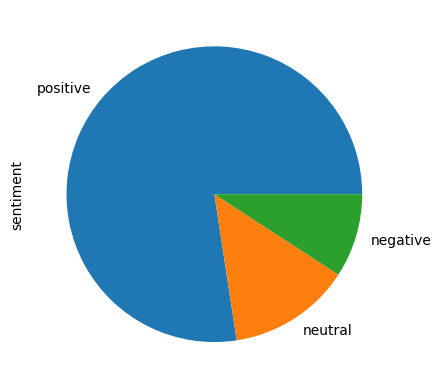

In [31]:
review['sentiment'].value_counts().plot(kind='pie')

In [32]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [33]:
def create_wordcloud(text):
    mask = np.array(Image.open("b.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=1500,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

#### Word Cloud for all the texts

Word Cloud Saved Successfully


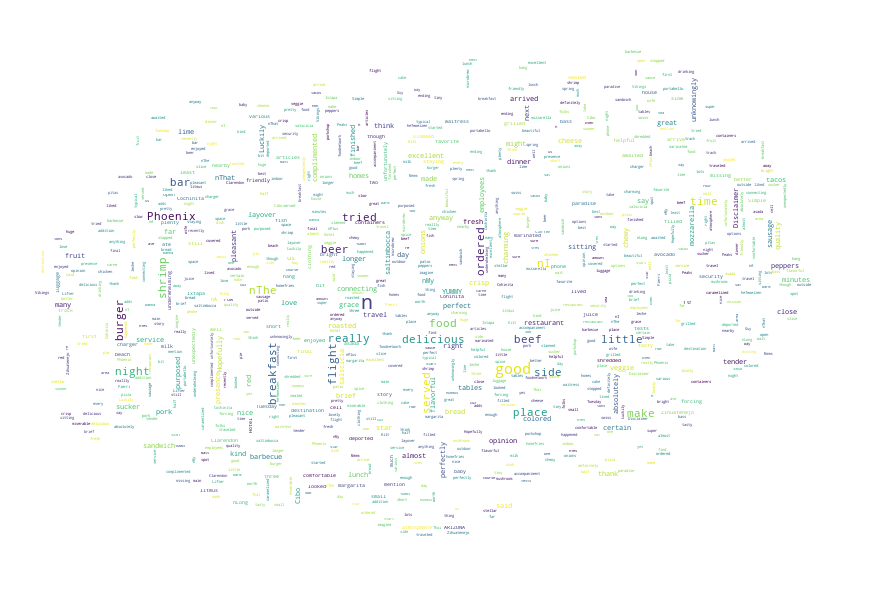

In [34]:
create_wordcloud(review["text"].values)


#### Word Cloud for negative texts

Word Cloud Saved Successfully


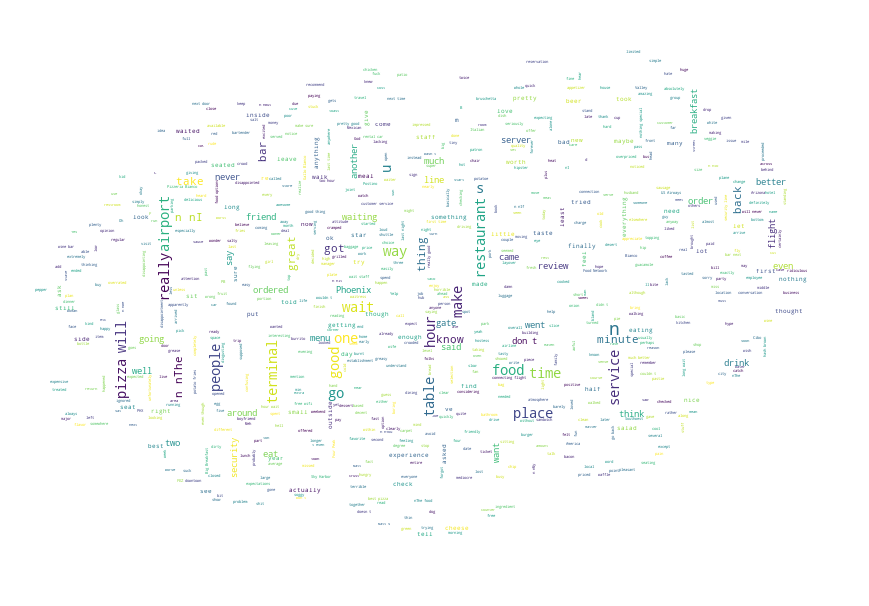

In [35]:
negative_values = review[review["sentiment"]=="negative"]

negative_values = negative_values["text"].values

create_wordcloud(negative_values)


#### Word Cloud for positive texts

Word Cloud Saved Successfully


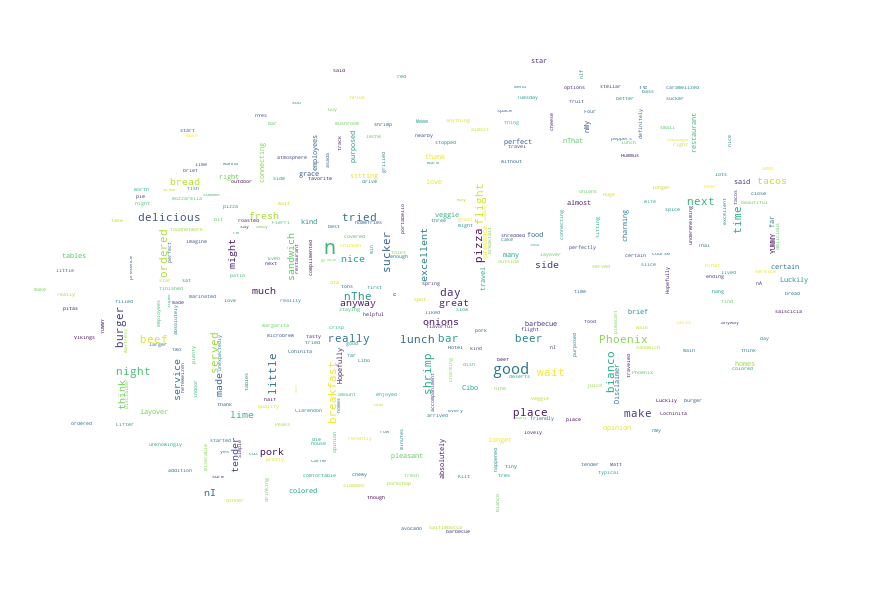

In [36]:
positive_values = review[review["sentiment"]=="positive"]

positive_values = positive_values["text"].values

create_wordcloud(positive_values)

#### Preprocess the text

In [37]:
import re
import string

In [38]:
# Text preprocessing steps - remove numbers, captial letters, punctuation, new line


alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
new_line = lambda x: re.sub('\n',' ',x)

review['text'] = review.text.map(alphanumeric).map(punc_lower).map(new_line)
review.head()

,stars,sentiment,text
7,4,positive,luckily i didn t have to travel far to make m...
30,5,positive,disclaimer like many of you i am a sucker fo...
90,1,negative,the beach paradise of ixtapa zihuatenejo await...
108,5,positive,it s just like pizza bianco without the wait ...
146,3,neutral,i have been through plenty of airports around ...


In [39]:
from langdetect import detect

for index, row in review['text'].iteritems():
    lang = detect(row) #detecting each row
    review.loc[index, 'Language'] = lang
    
review.head()

,stars,sentiment,text,Language
7,4,positive,luckily i didn t have to travel far to make m...,en
30,5,positive,disclaimer like many of you i am a sucker fo...,en
90,1,negative,the beach paradise of ixtapa zihuatenejo await...,en
108,5,positive,it s just like pizza bianco without the wait ...,en
146,3,neutral,i have been through plenty of airports around ...,en


In [40]:
count_values_in_column(review,"Language")

,Total,Percentage
en,6453,99.54
ca,3,0.05
af,3,0.05
tr,3,0.05
sw,2,0.03
sl,2,0.03
it,2,0.03
de,2,0.03
fr,2,0.03
cy,2,0.03


In [41]:
review.head()

,stars,sentiment,text,Language
7,4,positive,luckily i didn t have to travel far to make m...,en
30,5,positive,disclaimer like many of you i am a sucker fo...,en
90,1,negative,the beach paradise of ixtapa zihuatenejo await...,en
108,5,positive,it s just like pizza bianco without the wait ...,en
146,3,neutral,i have been through plenty of airports around ...,en


In [42]:
len(review)

6483

In [43]:
review.sentiment.value_counts(normalize=False)

positive    5019
neutral      870
negative     594
Name: sentiment, dtype: int64

In [44]:
review_es = review[review["Language"] == "en"]

len(review_es)

6453

In [45]:
count_values_in_column(review_es,"Language")

,Total,Percentage
en,6453,100.0


###  Data Analysis

#### Split data into training and test sets


In [46]:
X = review_es.text
y = review_es.sentiment

In [47]:
# y.to_csv("./csv/test.csv")

pd.DataFrame(X.head())

,text
7,luckily i didn t have to travel far to make m...
30,disclaimer like many of you i am a sucker fo...
90,the beach paradise of ixtapa zihuatenejo await...
108,it s just like pizza bianco without the wait ...
146,i have been through plenty of airports around ...


In [48]:
pd.DataFrame(y.head())

,sentiment
7,positive
30,positive
90,negative
108,positive
146,neutral


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
print("Total records: ",len(review))
print("Train records: ",len(X_train))
print("Test records : ",len(X_test))

Total records:  6483
Train records:  4517
Test records :  1936


### Feature Extraction - Text to Vector

#### CountVectorizer
- Document-term matrix using Count Vectorizer [counts of unigrams]

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).sample(10)

,aa,aaa,aaaaaaah,aaaaand,aaah,aah,aahs,aas,ab,abandon,...,zone,zonie,zonies,zoning,zoo,zucchini,zucchinni,zuchini,zuchinni,zydeco
4195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### N-grams
- Document-term matrix using N-grams

In [52]:
# The second document-term matrix has both unigrams and bigrams, and indicators instead of counts
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

,aa,aa second,aa upsetting,aaa,aaa discounts,aaaaaaah,aaaaaaah love,aaaaand,aaaaand able,aaah,...,zucchini thought,zucchini topped,zucchinni,zucchinni probably,zuchini,zuchini sweet,zuchinni,zuchinni green,zydeco,zydeco bend
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TF-IDF
- Document-term matrix using TF-IDF

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names()).head()

,aa,aaa,aaaaaaah,aaaaand,aaah,aah,aahs,aas,ab,abandon,...,zone,zonie,zonies,zoning,zoo,zucchini,zucchinni,zuchini,zuchinni,zydeco
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### TF-IDF + N-gram
- Document-term matrix using TF-IDF & N-gram

In [55]:
tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

pd.DataFrame(X_train_tfidf2.toarray(), columns=tfidf2.get_feature_names()).head()

,aa,aa second,aa upsetting,aaa,aaa discounts,aaaaaaah,aaaaaaah love,aaaaand,aaaaand able,aaah,...,zucchini thought,zucchini topped,zucchinni,zucchinni probably,zuchini,zuchini sweet,zuchinni,zuchinni green,zydeco,zydeco bend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Design

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

#### Logistic regression model 

- with the CountVectorizer Data

In [57]:
lr = LogisticRegression()

In [58]:
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [60]:
print("logistic regression model confusion matrix: \n\n", confusion_matrix(y_test, y_pred_cv1))

logistic regression model confusion matrix: 

 [[  61   32   61]
 [  36   87  136]
 [  21   93 1409]]


In [61]:
def show_metrics(data, pred):
    accuracy = accuracy_score(data, pred)
    f1 = f1_score(data, pred, average='weighted')
    precision = precision_score(data, pred, average='weighted')
    recall = recall_score(data, pred, average='weighted')

    cm = [accuracy, precision, recall, f1]

    print("Accuracy: {:.2%}".format(accuracy))
    print("Precision: {:.2%}".format(precision))
    print("Recall: {:.2%}".format(recall))
    print("F1 Score: {:.2%}".format(f1))
    
    return cm

In [62]:
cm1 = show_metrics(y_test, y_pred_cv1)

Accuracy: 80.42%
Precision: 78.62%
Recall: 80.42%
F1 Score: 79.36%


In [63]:
# Print confusion matrix for logistic regression model
def show_graph(data, pred):
    confusion = confusion_matrix(data, pred)

    plt.figure(dpi=100)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
                xticklabels=['negative', 'neutral','positive'],
                yticklabels=['negative', 'neutral','positive'],
                fmt='d', annot_kws={'fontsize':20})

    plt.xticks(rotation=0)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted Sentiments')
    plt.ylabel('Actual Sentiments')
    plt.show()

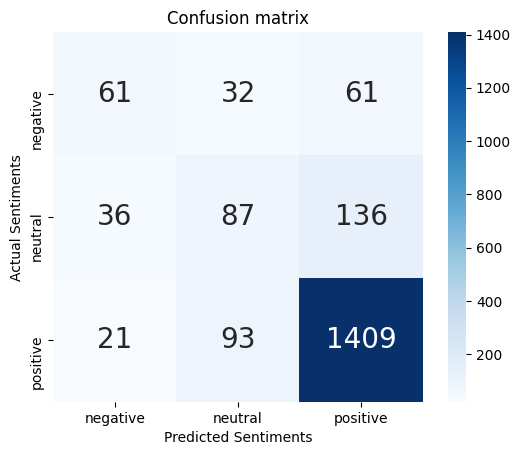

In [64]:
show_graph(y_test, y_pred_cv1)

#### Make prediction using the trained model

In [65]:
text = ['This movie was very good and excellent', 
        'Absolutely a joy ride, I am happy', 
        'Steven Seagal was terrible', 
        'I fell asleep halfway through', 
        'I cannot recommend this highly enough', 
        'Steven Seagal was amazingly good, his performance was Oscar-worthy and great.']


reviews = cv1.transform(text)

In [66]:
pred = lr.predict(reviews)

pred

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive'], dtype=object)

In [67]:
for review, category in zip(text, pred):
    print('{}         ======>   {}'.format(review, category))
    print()

This movie was very good and excellent         ======>   positive

Absolutely a joy ride, I am happy         ======>   positive

Steven Seagal was terrible         ======>   positive

I fell asleep halfway through         ======>   positive

I cannot recommend this highly enough         ======>   positive

Steven Seagal was amazingly good, his performance was Oscar-worthy and great.         ======>   positive



#### Ooooops, the result is not very goo, lets try with the ngram vectorizer

#### Logistic regression model 

- with the N-grams Data

In [68]:
lr = LogisticRegression()

lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

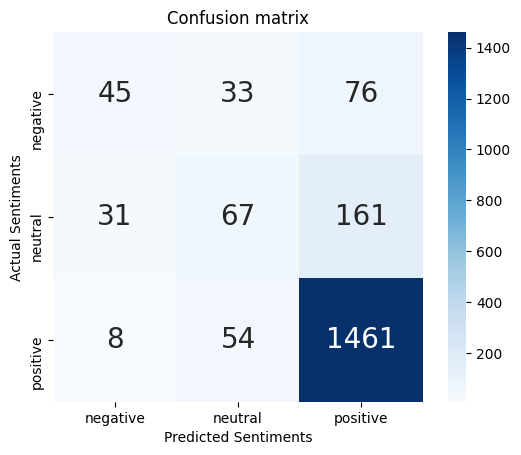

In [69]:
show_graph(y_test, y_pred_cv2)

In [70]:
cm2 = show_metrics(y_test, y_pred_cv2)

Accuracy: 81.25%
Precision: 77.77%
Recall: 81.25%
F1 Score: 78.71%


#### Make prediction using the trained model

In [71]:
text = ['This movie was very good and excellent', 
        'Absolutely a joy ride, I am happy', 
        'Steven Seagal was terrible', 
        'I fell asleep halfway through', 
        'I cannot recommend this highly enough', 
        'Steven Seagal was amazingly good, his performance was Oscar-worthy and great.']


reviews = cv2.transform(text)

In [72]:
pred = lr.predict(reviews)

pred

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive'], dtype=object)

In [73]:
for review, category in zip(text, pred):
    print('{}         ======>   {}'.format(review, category))
    print()

This movie was very good and excellent         ======>   positive

Absolutely a joy ride, I am happy         ======>   positive

Steven Seagal was terrible         ======>   positive

I fell asleep halfway through         ======>   positive

I cannot recommend this highly enough         ======>   positive

Steven Seagal was amazingly good, his performance was Oscar-worthy and great.         ======>   positive



#### Compile all of the error metrics into a dataframe for comparison


In [74]:
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR1-CV', 'LR2-CV-Ngr']

round(results,3)

,LR1-CV,LR2-CV-Ngr
Accuracy,0.804,0.812
Precision,0.786,0.778
Recall,0.804,0.812
F1 Score,0.794,0.787


### Train Multiple Models Together
- KNeighbors Classifier
- Decision Tree Classifier
- Random Forest Classifier
- AdaBoost Classifier
- Gradient Boosting Classifier

In [75]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

In [76]:
def run_all_models(classifiers, data, label, test_data, test_label, method):
    log_cols=["Classifier", "Methods", "Accuracy", "Precision","Recall","F1Score"]
    log = pd.DataFrame(columns=log_cols)

    for clf in classifiers:
        clf.fit(data, label)
        name = clf.__class__.__name__



        train_predictions = clf.predict(test_data)
        
        accuracy = accuracy_score(test_label, train_predictions)
        f1 = f1_score(test_label, train_predictions,average='weighted')
        precision = precision_score(test_label, train_predictions,average='weighted')
        recall = recall_score(test_label, train_predictions,average='weighted')


        log_entry = pd.DataFrame([[name, method, accuracy*100, precision*100, recall*100, f1*100]], columns=log_cols)
        log = log.append(log_entry) 
        
    print(round(log, 3))
    
    return log

### Analytical Analysis of Models

#### Result on Count Vectorizer Data

In [77]:
log1 = run_all_models(classifiers, X_train_cv1, y_train, X_test_cv1, y_test, "Count_Vec")

                   Classifier    Methods  Accuracy  Precision  Recall  F1Score
0        KNeighborsClassifier  Count_Vec    74.277     70.699  74.277   71.159
0      DecisionTreeClassifier  Count_Vec    72.469     71.535  72.469   71.987
0      RandomForestClassifier  Count_Vec    79.494     76.048  79.494   71.738
0          AdaBoostClassifier  Count_Vec    79.700     75.102  79.700   75.848
0  GradientBoostingClassifier  Count_Vec    79.649     73.293  79.649   73.786


#### Result on N-grams Data

In [78]:
log2 = run_all_models(classifiers, X_train_cv2, y_train, X_test_cv2, y_test, "N-grams")

                   Classifier  Methods  Accuracy  Precision  Recall  F1Score
0        KNeighborsClassifier  N-grams    50.517     67.455  50.517   55.640
0      DecisionTreeClassifier  N-grams    75.052     72.746  75.052   73.778
0      RandomForestClassifier  N-grams    78.719     74.387  78.719   69.514
0          AdaBoostClassifier  N-grams    79.236     74.295  79.236   75.333
0  GradientBoostingClassifier  N-grams    79.494     73.135  79.494   73.456


#### Result on TF-IDF Data

In [79]:
log3 = run_all_models(classifiers, X_train_tfidf1, y_train, X_test_tfidf1, y_test, "TF-IDF")

                   Classifier Methods  Accuracy  Precision  Recall  F1Score
0        KNeighborsClassifier  TF-IDF    77.221     72.884  77.221   74.239
0      DecisionTreeClassifier  TF-IDF    72.004     71.359  72.004   71.675
0      RandomForestClassifier  TF-IDF    78.874     74.641  78.874   70.264
0          AdaBoostClassifier  TF-IDF    78.048     72.324  78.048   73.948
0  GradientBoostingClassifier  TF-IDF    80.475     75.612  80.475   75.040


#### Result on TF-IDF & N-grams Data

In [80]:
log4 = run_all_models(classifiers, X_train_tfidf2, y_train, X_test_tfidf2, y_test, "TF+Ngs")

                   Classifier Methods  Accuracy  Precision  Recall  F1Score
0        KNeighborsClassifier  TF+Ngs    78.771     73.915  78.771   75.252
0      DecisionTreeClassifier  TF+Ngs    69.525     71.605  69.525   70.500
0      RandomForestClassifier  TF+Ngs    78.874     77.503  78.874   70.062
0          AdaBoostClassifier  TF+Ngs    77.789     72.983  77.789   74.523
0  GradientBoostingClassifier  TF+Ngs    80.785     76.146  80.785   76.712


In [81]:
result = pd.concat([log1,log2,log3,log4],axis=0)

result

,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,KNeighborsClassifier,Count_Vec,74.276860,70.699039,74.276860,71.159101
0,DecisionTreeClassifier,Count_Vec,72.469008,71.535017,72.469008,71.987222
0,RandomForestClassifier,Count_Vec,79.493802,76.048041,79.493802,71.737736
0,AdaBoostClassifier,Count_Vec,79.700413,75.101917,79.700413,75.848092
0,GradientBoostingClassifier,Count_Vec,79.648760,73.292800,79.648760,73.786221
0,KNeighborsClassifier,N-grams,50.516529,67.454733,50.516529,55.640206
0,DecisionTreeClassifier,N-grams,75.051653,72.746319,75.051653,73.777805
0,RandomForestClassifier,N-grams,78.719008,74.386849,78.719008,69.514004
0,AdaBoostClassifier,N-grams,79.235537,74.295299,79.235537,75.333230
0,GradientBoostingClassifier,N-grams,79.493802,73.135190,79.493802,73.456053


In [82]:
# Create new column called "cm" which is the classifier and method tagged together

result["CM"]=result["Classifier"] +"_"+ result["Methods"]

result.head()

,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,KNeighborsClassifier,Count_Vec,74.276860,70.699039,74.276860,71.159101,KNeighborsClassifier_Count_Vec
0,DecisionTreeClassifier,Count_Vec,72.469008,71.535017,72.469008,71.987222,DecisionTreeClassifier_Count_Vec
0,RandomForestClassifier,Count_Vec,79.493802,76.048041,79.493802,71.737736,RandomForestClassifier_Count_Vec
0,AdaBoostClassifier,Count_Vec,79.700413,75.101917,79.700413,75.848092,AdaBoostClassifier_Count_Vec
0,GradientBoostingClassifier,Count_Vec,79.648760,73.292800,79.648760,73.786221,GradientBoostingClassifier_Count_Vec


In [83]:
result.groupby("Classifier").mean()

,Accuracy,Precision,Recall,F1Score
Classifier,,,,
AdaBoostClassifier,78.693182,73.675957,78.693182,74.913147
DecisionTreeClassifier,72.262397,71.811250,72.262397,71.984932
GradientBoostingClassifier,80.100723,74.546501,80.100723,74.748622
KNeighborsClassifier,70.196281,71.238053,70.196281,69.072356
RandomForestClassifier,78.990186,75.644811,78.990186,70.394327


#### Comparison of the models Accuracy


In [84]:
result.sort_values("Accuracy",ascending=False).head(5)


,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,GradientBoostingClassifier,TF+Ngs,80.785124,76.146276,80.785124,76.712023,GradientBoostingClassifier_TF+Ngs
0,GradientBoostingClassifier,TF-IDF,80.475207,75.611739,80.475207,75.040193,GradientBoostingClassifier_TF-IDF
0,AdaBoostClassifier,Count_Vec,79.700413,75.101917,79.700413,75.848092,AdaBoostClassifier_Count_Vec
0,GradientBoostingClassifier,Count_Vec,79.648760,73.292800,79.648760,73.786221,GradientBoostingClassifier_Count_Vec
0,RandomForestClassifier,Count_Vec,79.493802,76.048041,79.493802,71.737736,RandomForestClassifier_Count_Vec


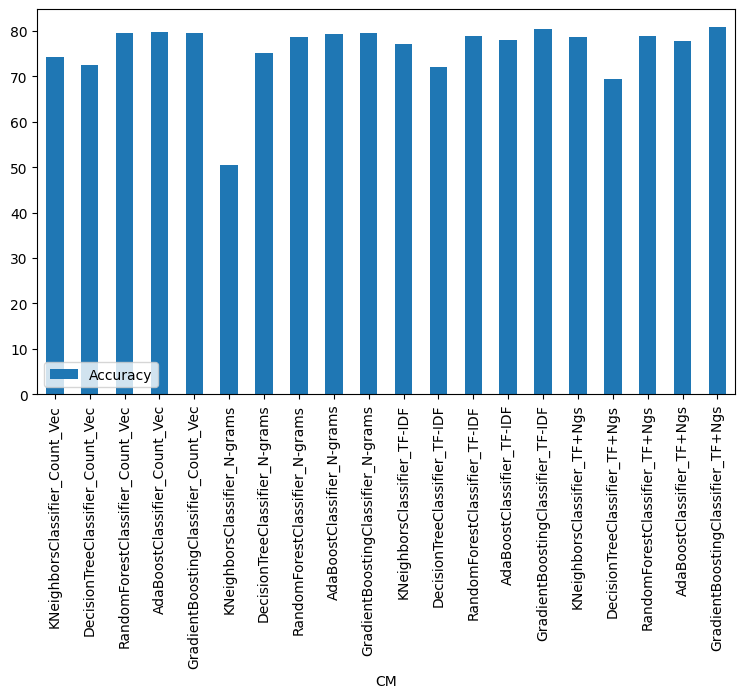

In [85]:
ans = pd.DataFrame(result, columns=["CM", "Accuracy"])

ans.plot(x="CM", y=["Accuracy"], kind="bar",figsize=(9,5))
plt.legend(loc='lower left')

plt.show()

#### Comparison of the models Precision

In [86]:
result.sort_values("Precision",ascending=False).head(5)


,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,RandomForestClassifier,TF+Ngs,78.873967,77.503384,78.873967,70.061835,RandomForestClassifier_TF+Ngs
0,GradientBoostingClassifier,TF+Ngs,80.785124,76.146276,80.785124,76.712023,GradientBoostingClassifier_TF+Ngs
0,RandomForestClassifier,Count_Vec,79.493802,76.048041,79.493802,71.737736,RandomForestClassifier_Count_Vec
0,GradientBoostingClassifier,TF-IDF,80.475207,75.611739,80.475207,75.040193,GradientBoostingClassifier_TF-IDF
0,AdaBoostClassifier,Count_Vec,79.700413,75.101917,79.700413,75.848092,AdaBoostClassifier_Count_Vec


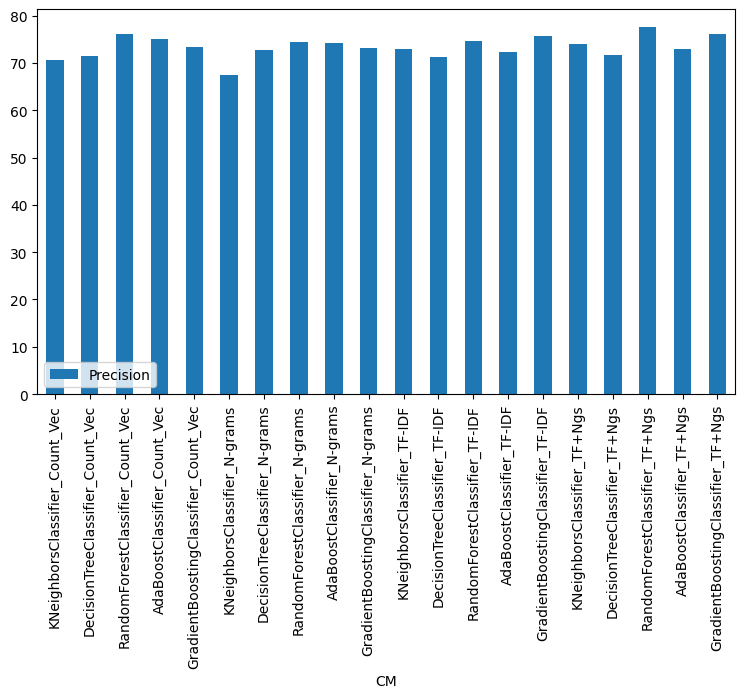

In [87]:
ans = pd.DataFrame(result, columns=["CM", "Precision"])

ans.plot(x="CM", y=["Precision"], kind="bar",figsize=(9,5))
plt.legend(loc='lower left')

plt.show()

#### Comparison of the models Recall

In [88]:
result.sort_values("Recall",ascending=False).head(5)


,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,GradientBoostingClassifier,TF+Ngs,80.785124,76.146276,80.785124,76.712023,GradientBoostingClassifier_TF+Ngs
0,GradientBoostingClassifier,TF-IDF,80.475207,75.611739,80.475207,75.040193,GradientBoostingClassifier_TF-IDF
0,AdaBoostClassifier,Count_Vec,79.700413,75.101917,79.700413,75.848092,AdaBoostClassifier_Count_Vec
0,GradientBoostingClassifier,Count_Vec,79.648760,73.292800,79.648760,73.786221,GradientBoostingClassifier_Count_Vec
0,RandomForestClassifier,Count_Vec,79.493802,76.048041,79.493802,71.737736,RandomForestClassifier_Count_Vec


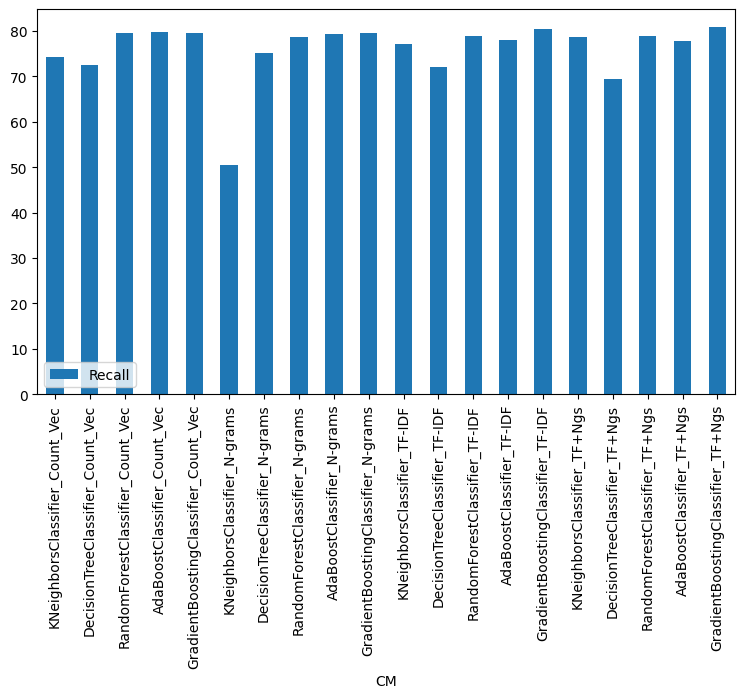

In [89]:
ans = pd.DataFrame(result, columns=["CM", "Recall"])

ans.plot(x="CM", y=["Recall"], kind="bar",figsize=(9,5))
plt.legend(loc='lower left')

plt.show()

#### Comparison of the models F1Score

In [90]:
result.sort_values("F1Score",ascending=False).head(5)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,GradientBoostingClassifier,TF+Ngs,80.785124,76.146276,80.785124,76.712023,GradientBoostingClassifier_TF+Ngs
0,AdaBoostClassifier,Count_Vec,79.700413,75.101917,79.700413,75.848092,AdaBoostClassifier_Count_Vec
0,AdaBoostClassifier,N-grams,79.235537,74.295299,79.235537,75.333230,AdaBoostClassifier_N-grams
0,KNeighborsClassifier,TF+Ngs,78.770661,73.914779,78.770661,75.251532,KNeighborsClassifier_TF+Ngs
0,GradientBoostingClassifier,TF-IDF,80.475207,75.611739,80.475207,75.040193,GradientBoostingClassifier_TF-IDF


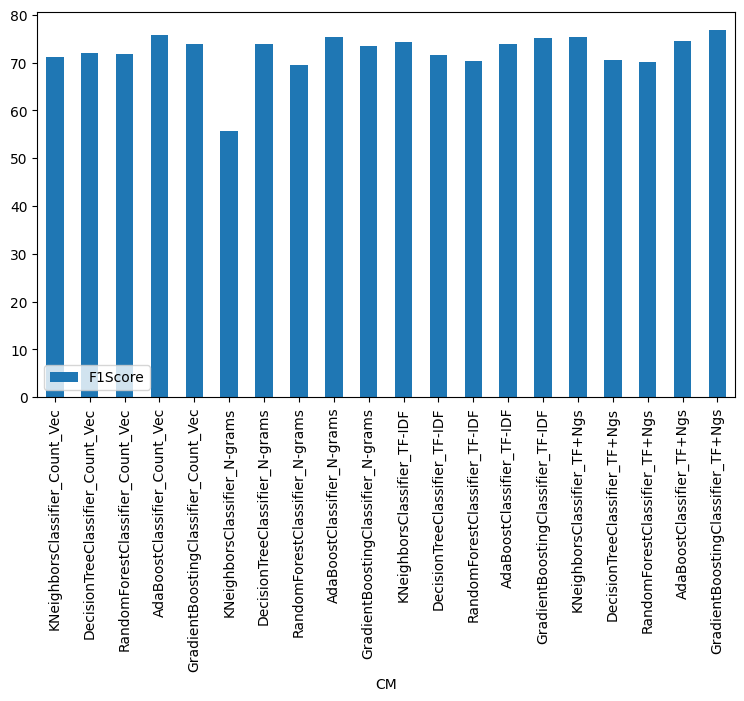

In [91]:
ans = pd.DataFrame(result, columns=["CM", "F1Score"])

ans.plot(x="CM", y=["F1Score"], kind="bar",figsize=(9,5))
plt.legend(loc='lower left')

plt.show()

#### Overall Comparison with all metrics

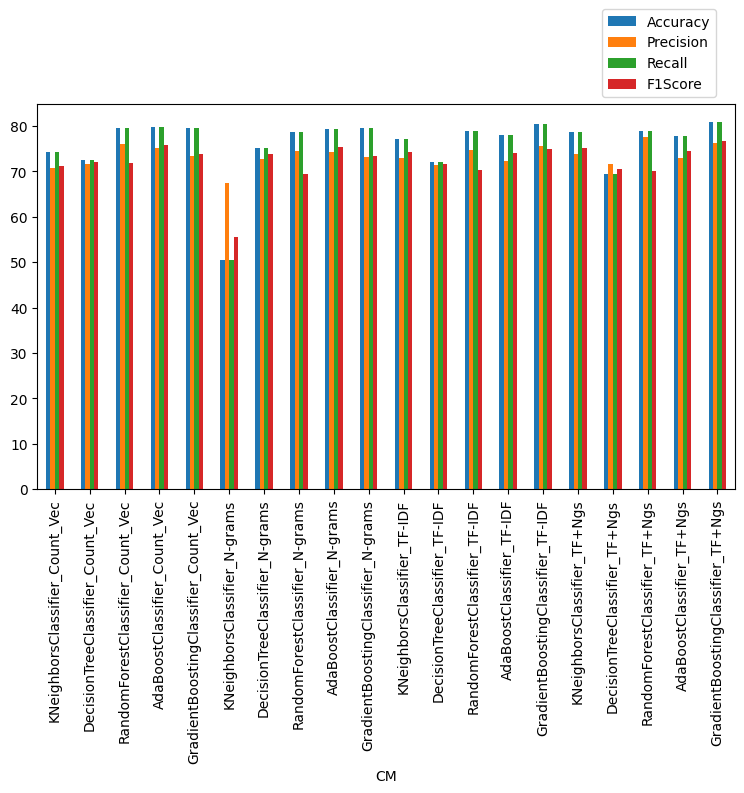

In [92]:
ans = pd.DataFrame(result, columns=["CM", "Accuracy", "Precision", "Recall", "F1Score"])

ans.plot(x="CM", y=["Accuracy", "Precision", "Recall", "F1Score"], kind="bar",figsize=(9,5))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))

plt.show()

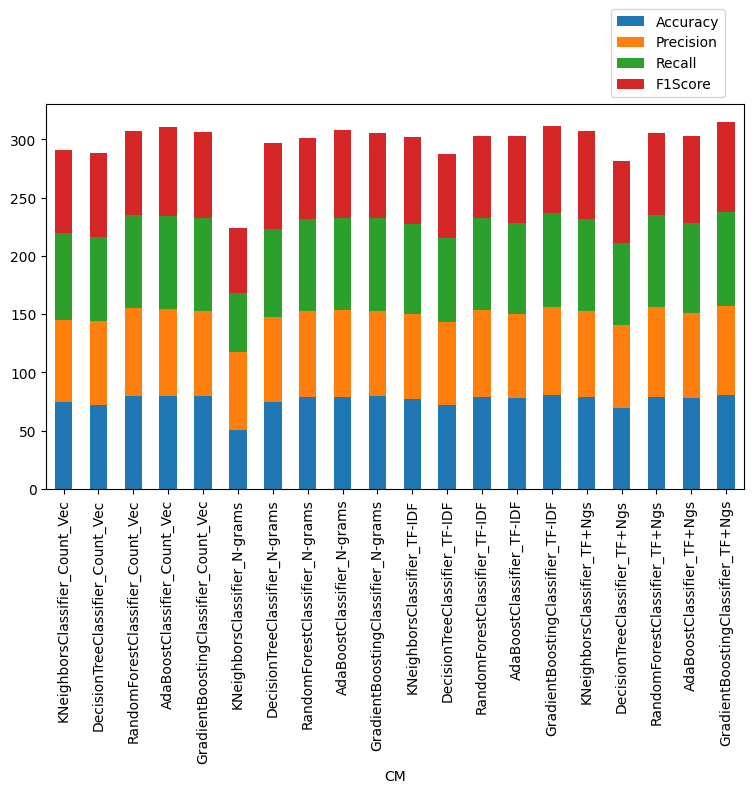

In [93]:
ans = pd.DataFrame(result, columns=["CM", "Accuracy", "Precision", "Recall", "F1Score"])

ans.plot(x="CM", y=["Accuracy", "Precision", "Recall", "F1Score"], kind="bar", stacked=True, figsize=(9,5))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))

plt.show()